# Mid Term Projects

**Problem Statement:**

This project is an in-depth analysis of SuperStore’s transaction data aimed at uncovering insights to support strategic business decisions. By exploring this dataset, I seek to understand the key drivers of sales and profitability, with a focus on customer segments, product categories, discounting practices, and regional performance.

The objectives of this analysis are:

1. Identify Financial Drivers: Conduct an in-depth examination of factors such as customer demographics, discount levels, and regional sales to determine which variables most significantly impact revenue and profitability. This will highlight high-value areas that SuperStore may prioritize to enhance overall financial performance.

2. Develop Predictive Models: Utilize linear regression to forecast sales and profit margins and logistic regression to classify orders as profitable or non-profitable. These models will aid in projecting future performance and guiding inventory, pricing, and marketing decisions.

3. Provide Actionable Recommendations: Based on the insights gained from financial analysis and predictive modeling, this project will offer data-driven strategies to optimize SuperStore’s revenue growth and profitability. Recommendations will cover discount policies, customer targeting, and inventory management.

This project serves as both a personal development initiative to refine my data science and financial analysis skills and a practical exploration of how data-driven insights can address real-world business challenges in the retail sector.




____

# Part 1: Data Processing

### Importing the necessary libraries, and loading the dataset


In [253]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import skimpy as sp
import dtale as dt

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [254]:
# file path of the CSV file
file_path = '/Users/teslim/OneDrive/mlzoomcamp/superstore_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Preview the loaded data
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


### Data Processing

In [255]:
# check the data types of the columns
df.dtypes

order_id          object
order_date        object
ship_date         object
customer          object
manufactory       object
product_name      object
segment           object
category          object
subcategory       object
region            object
zip                int64
city              object
state             object
country           object
discount         float64
profit           float64
quantity           int64
sales            float64
profit_margin    float64
dtype: object

In [256]:
# check the shape of the dataset
df.shape

(9994, 19)

In [ ]:
# droping irrelevant columns of 9 columns froom the 19 columns
df.drop(columns=[
    'order_id', 
    'order_date',
    'ship_date', 
    'customer', 
    'product_name',
    'country','zip', 
    'profit_margin',
    'manufactory',
    'city'], inplace=True)

In [ ]:
# check the shape of the dataset after dropping the 9 columns
df.shape

(9994, 9)

In [261]:
# converting the 'quantity column to float
df['quantity'] = df['quantity'].astype('float')

In [262]:
# confirming the conversion of the 'quantity' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   segment      9994 non-null   object 
 1   category     9994 non-null   object 
 2   subcategory  9994 non-null   object 
 3   region       9994 non-null   object 
 4   state        9994 non-null   object 
 5   discount     9994 non-null   float64
 6   profit       9994 non-null   float64
 7   quantity     9994 non-null   float64
 8   sales        9994 non-null   float64
dtypes: float64(4), object(5)
memory usage: 702.8+ KB


In [263]:
# missing values 
print(df.isnull().sum())

segment        0
category       0
subcategory    0
region         0
state          0
discount       0
profit         0
quantity       0
sales          0
dtype: int64


### Feature engineering


In [264]:
# computation of unit cost
df['cost'] =  df['sales'] - df['profit'] -  df['discount']

In [265]:
# confirm the shape of the dataframe. 
df.shape

(9994, 10)

In [266]:
# Preview the loaded data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   segment      9994 non-null   object 
 1   category     9994 non-null   object 
 2   subcategory  9994 non-null   object 
 3   region       9994 non-null   object 
 4   state        9994 non-null   object 
 5   discount     9994 non-null   float64
 6   profit       9994 non-null   float64
 7   quantity     9994 non-null   float64
 8   sales        9994 non-null   float64
 9   cost         9994 non-null   float64
dtypes: float64(5), object(5)
memory usage: 780.9+ KB


### Data Overview

In [267]:
# Preview the loaded data
dt.show(df)

In [268]:
# generate a summary of the data
sp.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9994   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0       ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ discount       │   0 │     0 │   0.1562 │   0.2065 │        0 │      0 │    0.2 │    0.2 │    0.8 │ ▇▆   ▁ │  │
│ │ profit         │   0 │     0 │    28.66 │    234.3 │    -6600 │  1.729 │  8.666 │  29.36 │   8400 │    ▇   │  │
│ │ quantity       │   0 │     0 │     3.79 │    2.225 │        1 │      2 │      3 │      5 │     14 │  ▇▃▂▁  │  │
│ │ sales          │   0 │     0 │    229.9 │    623.2 │    0.444 │  17.28 │  54.49 │  209.9 │  22640 │   ▇    │  │
│ │ cost           │   0 │     0 │      201 │    550.8 │   0.5544 │   12.5 │  41.58 │  181.9 │  24450 │   ▇    │  │
│ └────────────────┴─────┴───────┴──────────┴──────────┴──────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ segment                   │       0 │          0 │                          1.2 │                    11777 │  │
│ │ category                  │       0 │          0 │                          1.6 │                    16020 │  │
│ │ subcategory               │       0 │          0 │                            1 │                     9994 │  │
│ │ region                    │       0 │          0 │                            1 │                     9994 │  │
│ │ state                     │       0 │          0 │                          1.2 │                    11706 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### 1.6 indentify categorical and numerical columns

In [269]:
# collection of the numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns


['discount', 'profit', 'quantity', 'sales', 'cost']

In [270]:
# collection of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns


['segment', 'category', 'subcategory', 'region', 'state']

# Part 2: Exploratory Data Analysis

### 2.1 Explanatory of categorical columns

In [271]:
# checking the unique count of the categorical columns 
df[categorical_columns].nunique()

segment         3
category        3
subcategory    17
region          4
state          49
dtype: int64

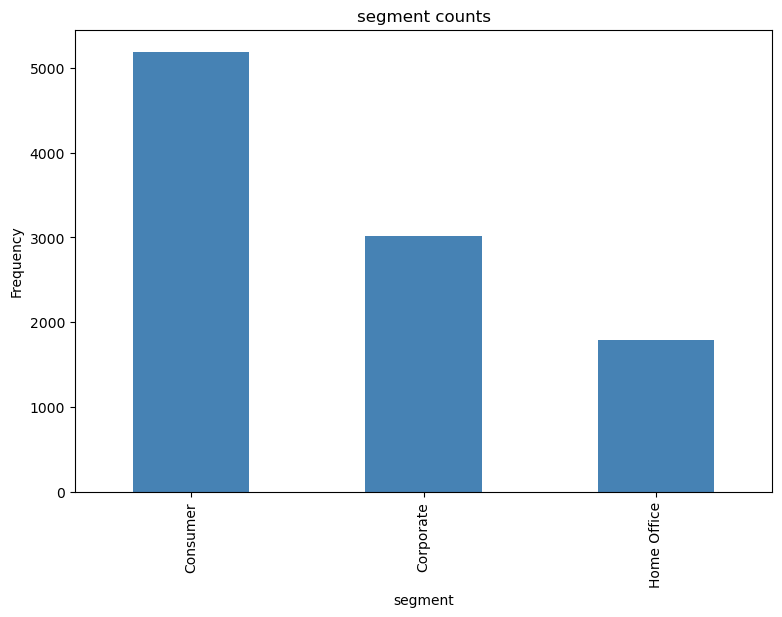

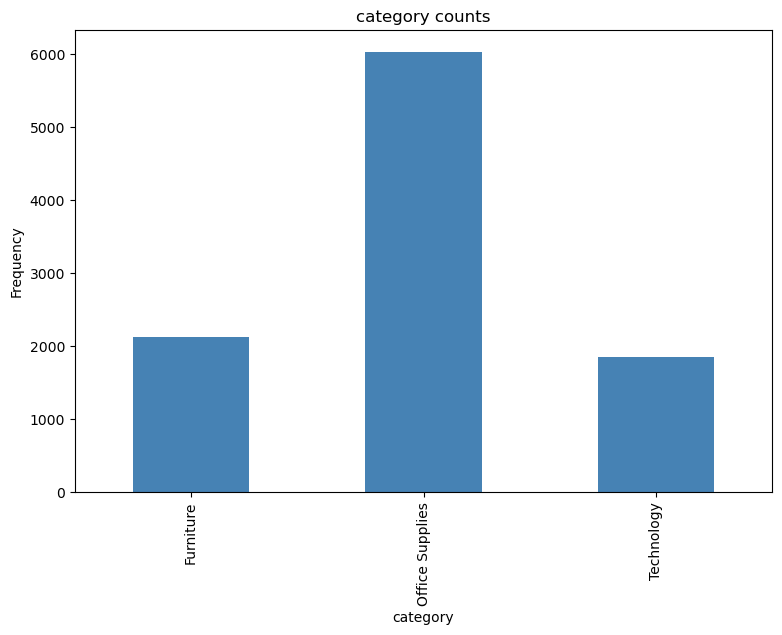

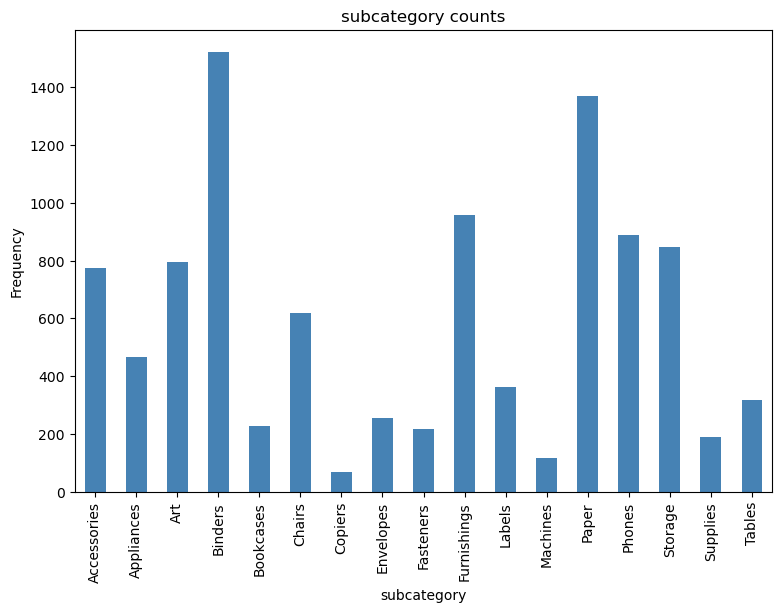

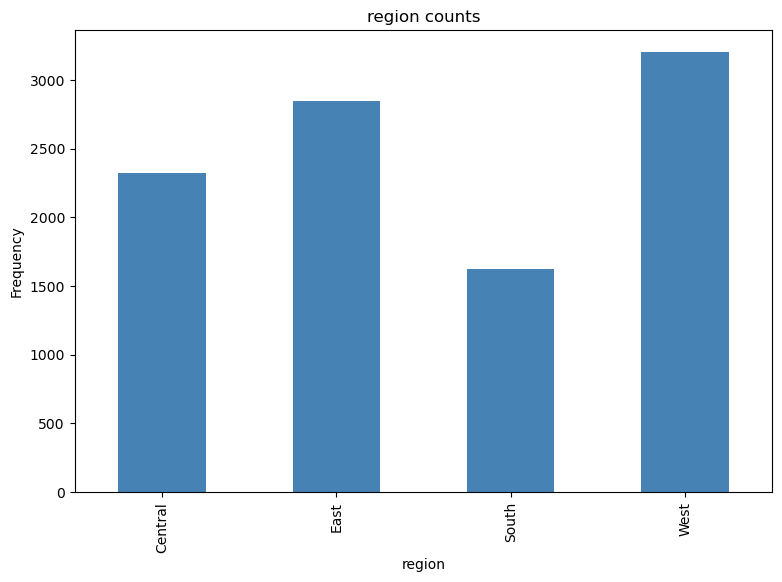

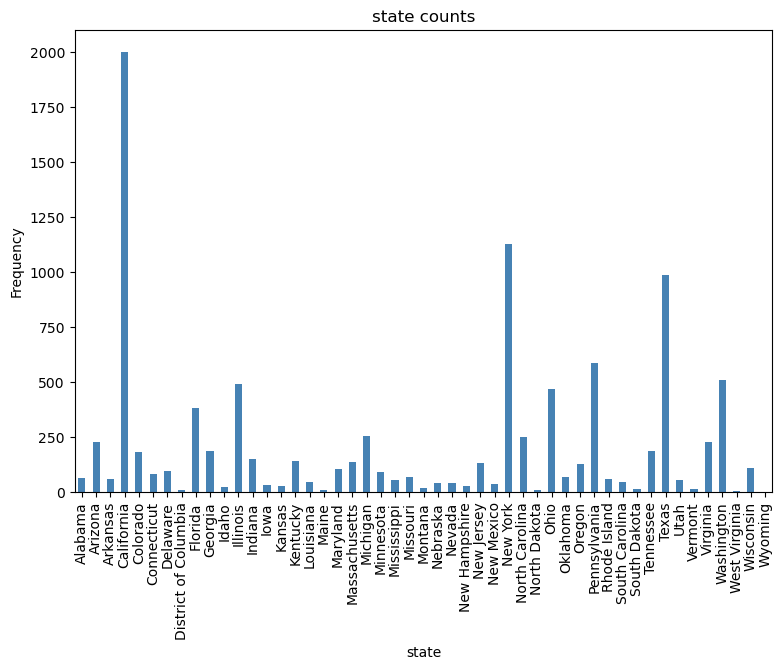

In [273]:
for col in categorical_columns:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

### 2.2 Explanatory of numerical columns

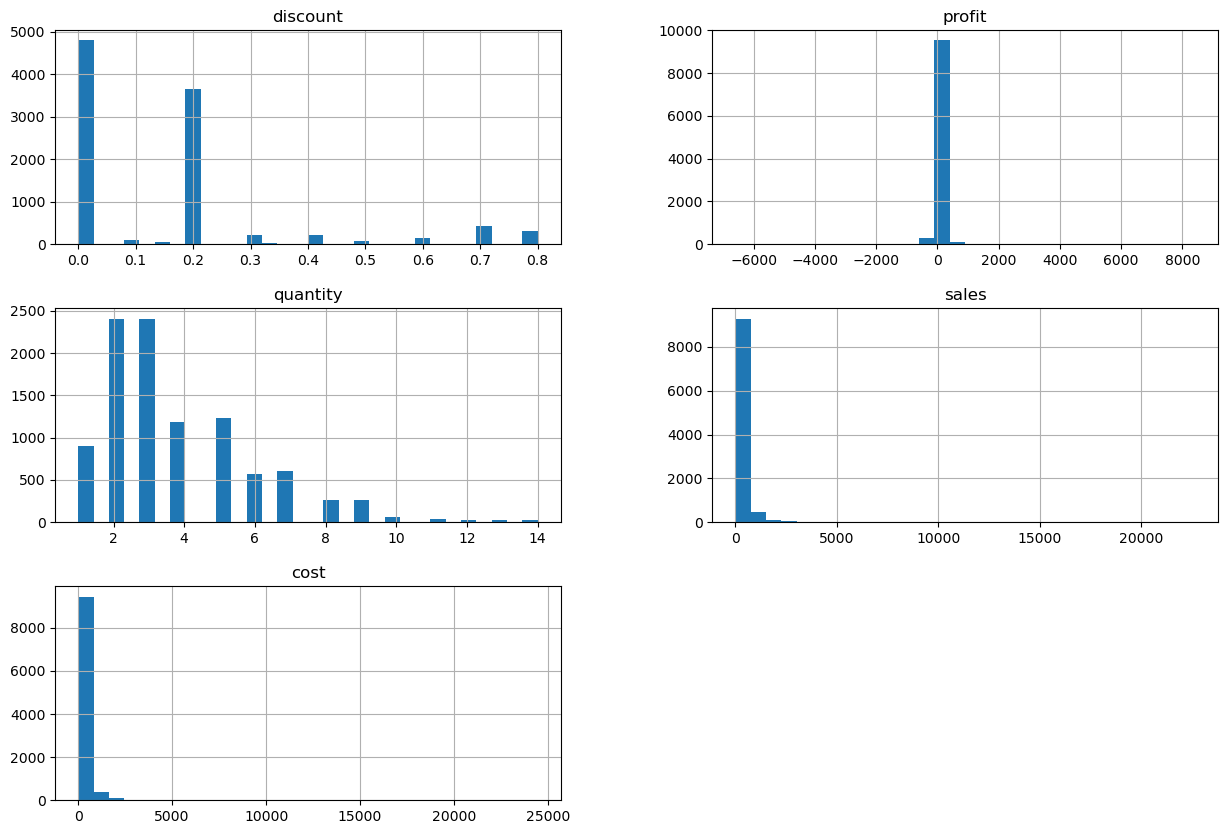

In [ ]:
#  Understanding Data Distributions
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15,10))
plt.show()

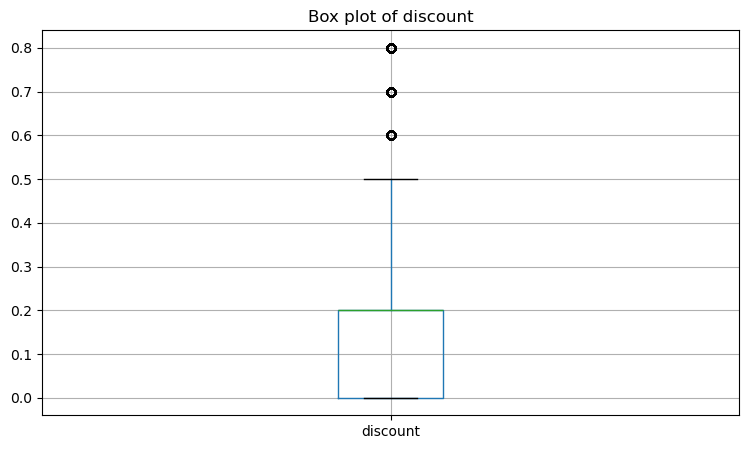

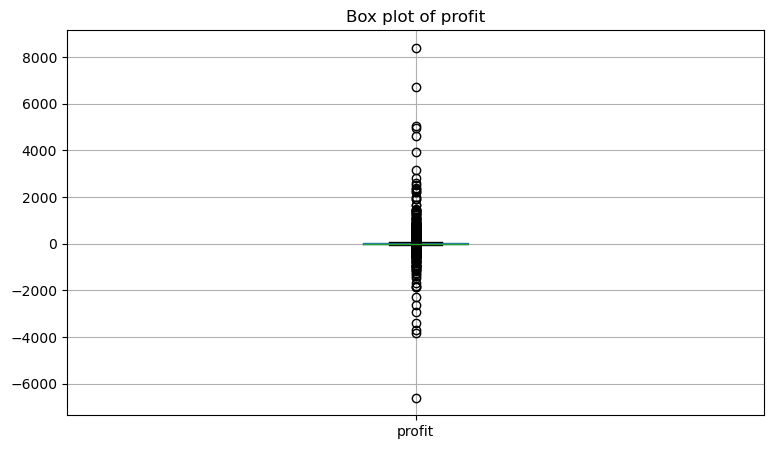

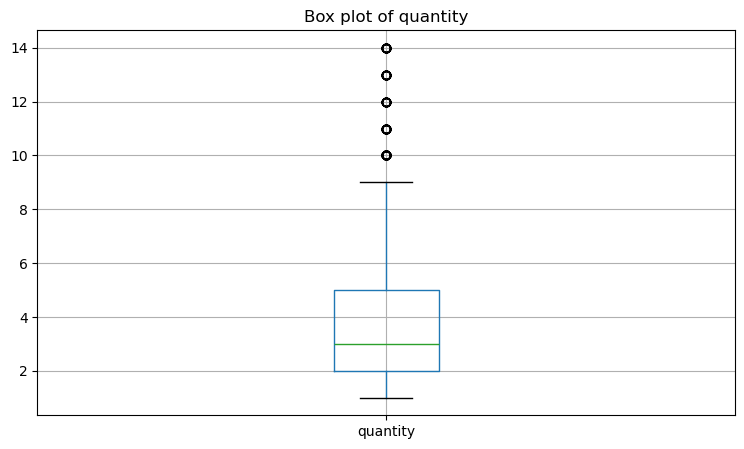

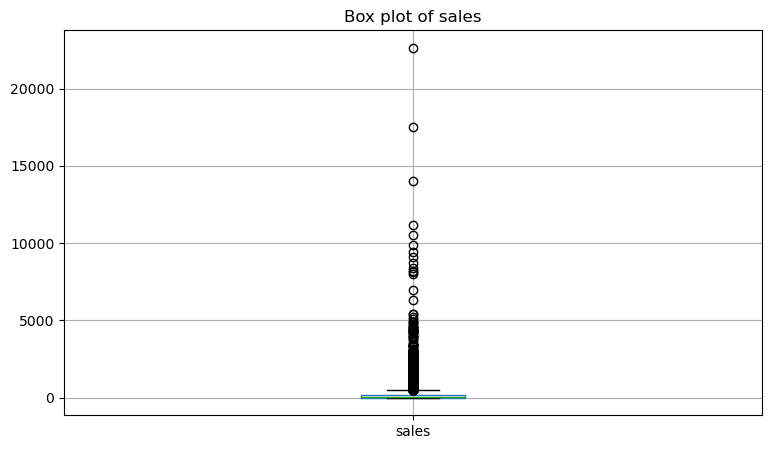

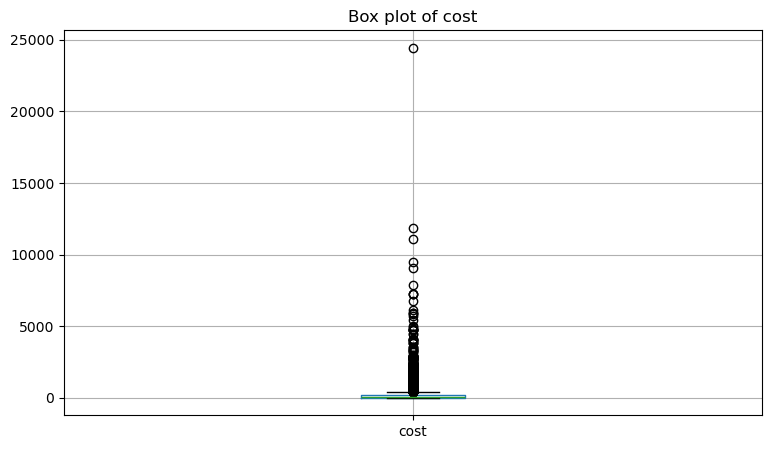

In [ ]:
# Box Plots: Useful for visualizing the distribution of numerical features and spotting outliers.
for col in numerical_columns:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    df.boxplot(column = col, ax = ax)
    ax.set_title('Box plot of ' + col)

In [ ]:
# Example using IQR for outlier detection
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter or cap outliers
df = df[(df[numerical_columns] >= (Q1 - 1.5 * IQR)) & (df[numerical_columns] <= (Q3 + 1.5 * IQR))]
df

In [274]:
# check the summary of the numerical columns
df[numerical_columns].describe()

,discount,profit,quantity,sales,cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,0.156203,28.656896,3.789574,229.858001,201.044902
std,0.206452,234.260108,2.225110,623.245101,550.826767
min,0.000000,-6599.978000,1.000000,0.444000,0.554400
25%,0.000000,1.728750,2.000000,17.280000,12.496700
50%,0.200000,8.666500,3.000000,54.490000,41.577000
75%,0.200000,29.364000,5.000000,209.940000,181.909500
max,0.800000,8399.976000,14.000000,22638.480000,24449.058400


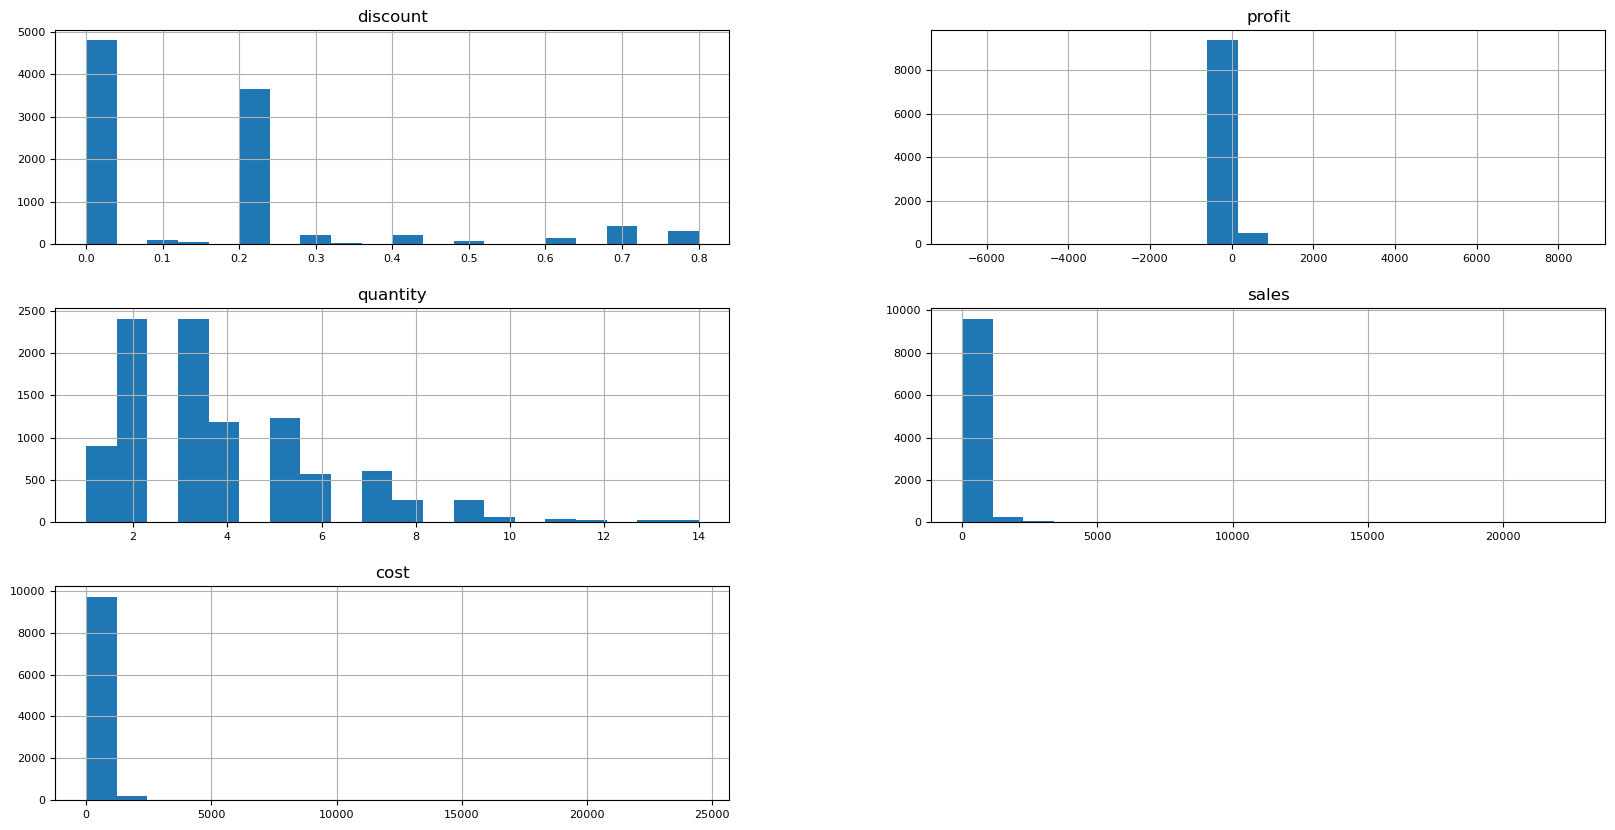

In [275]:
# understanding the distribution of the numerical columns
df[numerical_columns].hist(figsize=(20, 10), bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

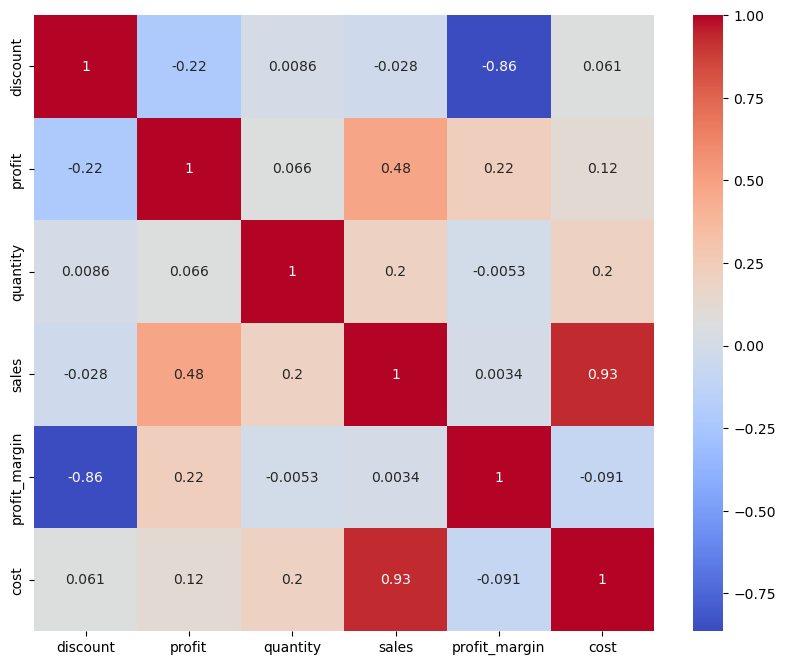

In [149]:
correlation = df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

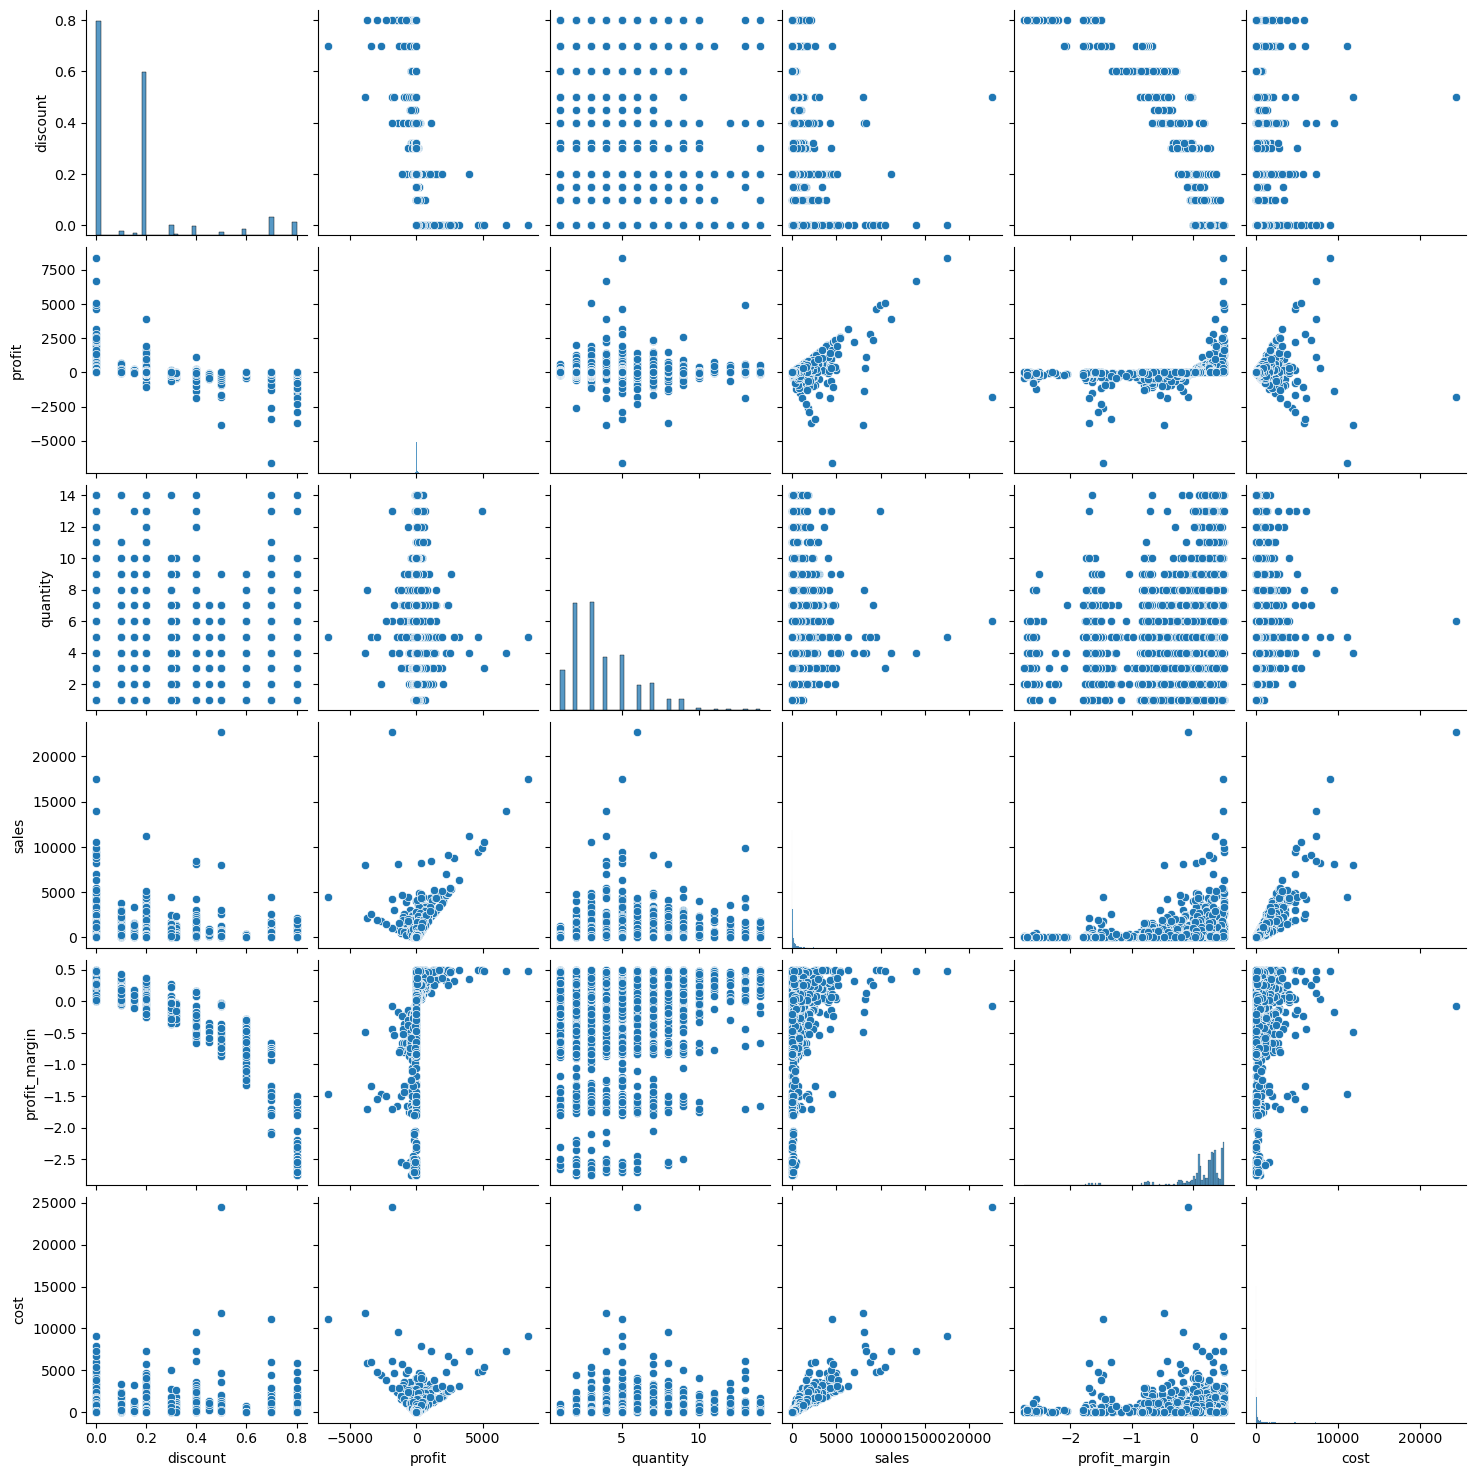

In [150]:
# Scatter Plots: For pairs of features with high correlation or suspected relationships, use scatter plots to further inspect patterns.
sns.pairplot(df[numerical_columns])

# Normalising the data

<Axes: xlabel='sales', ylabel='Count'>

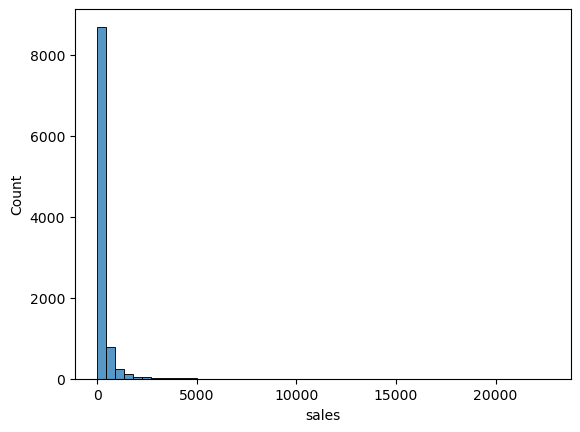

In [280]:
sns.histplot(df.sales, bins=50)

<Axes: xlabel='sales', ylabel='Count'>

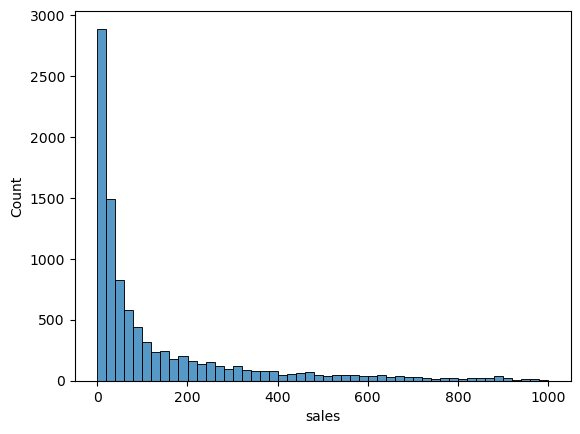

In [283]:
sns.histplot(df.sales[df.sales < 1000], bins=50)